# Leveraging U.S. Census Data

## I will be doing the following:
1. Decide upon which state to invest in.
2. Decide upon which city after picking state.
3. After choosing city, obtain custom dataset from U.S. Census Website with 2018 Data for population per zip code
4. Sort through the U.S. Census Data to find the top zip codes to analyze
    
    
## Qualitative Decisions and Assumptions:
 - Focus on where people are moving to. Which state are people leaving and to which state are the most people going to?
 - The investment firm is a smaller firm looking to expand into a new area.
 - The firm will want to have clusters of zip codes nearby for ease of management.
 - Firm will not be outsourcing work to other property managers. Work will be done in-house.
 - We will not be buying apartment buildings but are open to do so in the future.
 - We will look for areas where laws are favorable to landlords as a bonus. 
 - Since dataset given has data until April 2018, we will use data on or before that date to simulate real time

## 1. Deciding on which state to invest in:


### We first look at U.S. Census Data insights from 2017. This article was published on December 20, 2017:

https://www.census.gov/newsroom/press-releases/2017/estimates-idaho.html#:~:text=DEC.,state%20population%20estimates%20released%20today

### Where are the people moving to?

#### Per the article, we have the following: 

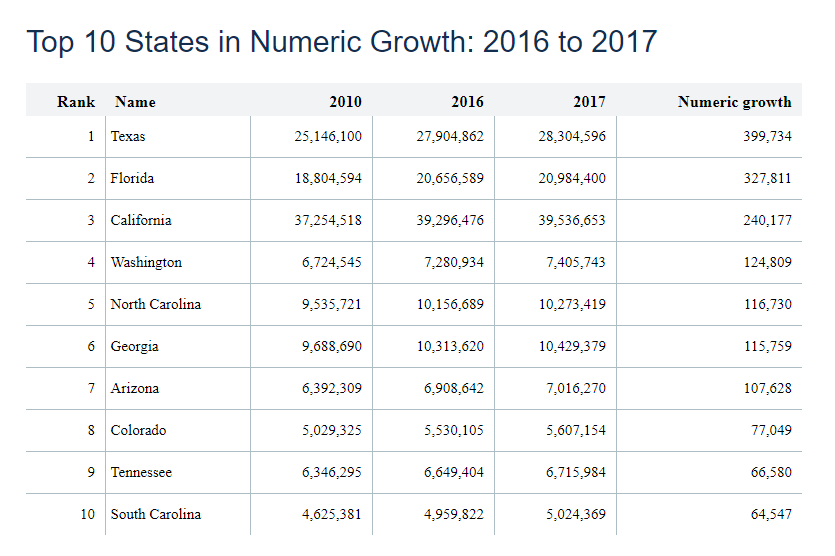

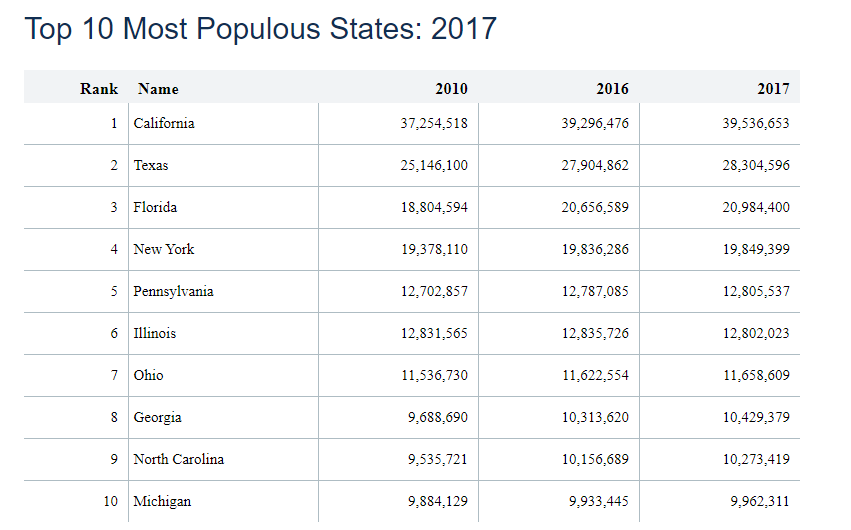

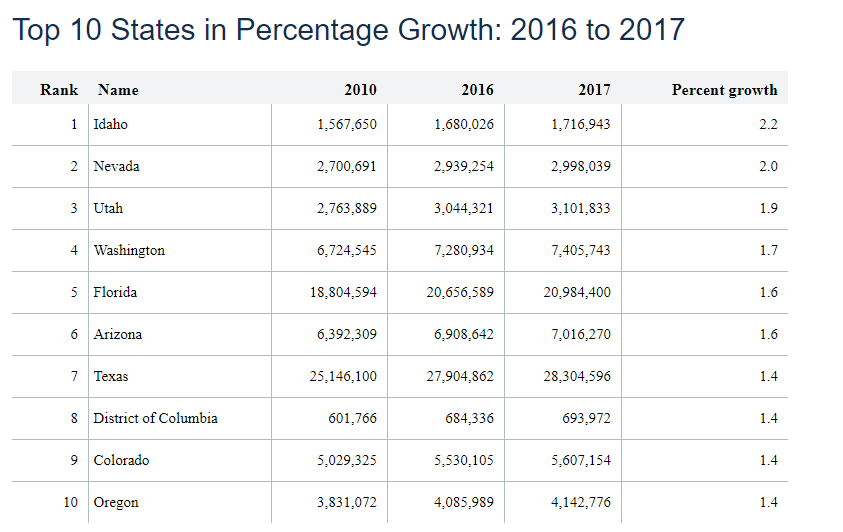

### I took this data and color coded which ones have overlap on all 3 lists:
 - From this overview, I placed priority on "Most Populous" and "Numerical Growth"
 - We see that Texas was present in all 3 columns
 - There are close runner-ups for which, if I had more time, I can investigate more into.
    
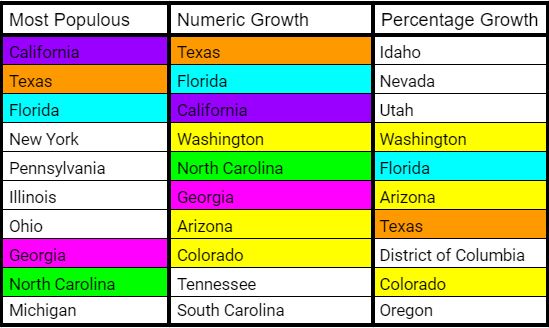


    

## 2. Deciding which city to invest in

### Going back to the Zillow dataset, I will filter out with pandas all the cities that exist in Texas and rank them based on the number of zip codes present in each city region.
 - Use value_counts() method to rank the top 5 cities
 - We will choose the city with the most zip codes to invest.

In [21]:
## Import the data

import pandas as pd
df_zillow = pd.read_csv('Data Files/zillow_data.csv')
df_zillow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [22]:
#Narrow down to Texas only dataframe and do value_count() for cities

df_zillow_1_bool = df_zillow['State'].isin(['TX'])
df_zillow_1 = df_zillow[df_zillow_1_bool]
df_zillow_1

RegionID  RegionName           City State              Metro  \
1         90668       75070       McKinney    TX  Dallas-Fort Worth   
2         91982       77494           Katy    TX            Houston   
4         93144       79936        El Paso    TX            El Paso   
5         91733       77084        Houston    TX            Houston   
8         91940       77449           Katy    TX            Houston   
...         ...         ...            ...   ...                ...   
14372     91640       76941        Mertzon    TX         San Angelo   
14472     92897       79313          Anton    TX          Levelland   
14492     92921       79355         Plains    TX                NaN   
14599     92929       79366  Ransom Canyon    TX            Lubbock   
14695     91948       77457      Matagorda    TX           Bay City   

      CountyName  SizeRank   1996-04   1996-05   1996-06  ...  2017-07  \
1         Collin         2  235700.0  236900.0  236700.0  ...   308000   
2         Harris         3  210400.0  212200.0  212200.0  ...   321000   
4        El Paso         5   77300.0   77300.0   77300.0  ...   119100   
5         Harris         6   95000.0   95200.0   95400.0  ...   157900   
8         Harris         9   95400.0   95600.0   95800.0  ...   166800   
...          ...       ...       ...       ...       ...  ...      ...   
14372      Irion     14373       NaN       NaN       NaN  ...   122500   
14472    Hockley     14473       NaN       NaN       NaN  ...    55400   
14492     Yoakum     14493       NaN       NaN       NaN  ...   100500   
14599    Lubbock     14600  134500.0  134500.0  134400.0  ...   252100   
14695  Matagorda     14696   90700.0   91000.0   91200.0  ...   250400   

       2017-08  2017-09  2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  \
1       310000   312500   314100   315000   316600   318100   319600   321100   
2       320600   320200   320400   320800   321200   321200   323000   326900   
4       119400   120000   120300   120300   120300   120300   120500   121000   
5       158700   160200   161900   162800   162800   162800   162900   163500   
8       167400   168400   169600   170900   172300   173300   174200   175400   
...        ...      ...      ...      ...      ...      ...      ...      ...   
14372   121800   121600   122200   123500   124700   124300   122600   121600   
14472    56300    55700    56300    58900    61500    63000    63600    63500   
14492   100500   101000   100700    99700    97700    95800    94600    94000   
14599   251600   251600   251500   251300   251500   251700   252500   255000   
14695   253300   256900   256100   250700   243200   238300   234200   230500   

       2018-04  
1       321800  
2       329900  
4       121500  
5       164300  
8       176200  
...        ...  
14372   121600  
14472    63300  
14492    93500  
14599   257500  
14695   227300  

[989 rows x 272 columns]

In [23]:
df_zillow_1['City'].value_counts()

Houston           86
San Antonio       47
Austin            38
Dallas            33
Fort Worth        26
                  ..
Aldine             1
Weatherford        1
Mount Pleasant     1
Canton             1
Mart               1
Name: City, Length: 540, dtype: int64

## We see from value_counts() of City that Houston has the most number of Cities. We will move forward with Houston as our choice. 

### Now that we have decided that Houston is a good fit, we can grab the corresponding population data from the U.S. Census database for all the zip codes in Houston. The steps to do so are as follows:

1. I will first separate only the Houston zip codes from the 2018 dataset that I was given. 
2. Make a list of all the zip codes that exist only for Houston
3. Census API can be called from the browser. All we have to do is input in the proper site address 
     - Input in the list of zip codes into the Census API
     - This is a workaround to manually choosing all the zip codes.


In [24]:
# Making list of the zip codes in Houston:

list_Houston_zips_bool = df_zillow_1['Metro'] == 'Houston'
list_Houston_zips = df_zillow_1[list_Houston_zips_bool]
list_Houston_zips_1 = list_Houston_zips['RegionName'].tolist()

print(list_Houston_zips_1)

[77494, 77084, 77449, 77573, 77584, 77429, 77479, 77036, 77433, 77077, 77379, 77459, 77095, 77450, 77082, 77057, 77007, 77521, 77083, 77346, 77070, 77375, 77373, 77081, 77063, 77386, 77042, 77546, 77407, 77072, 77015, 77396, 77008, 77040, 77511, 77089, 77406, 77339, 77088, 77581, 77469, 77539, 77099, 77090, 77388, 77024, 77064, 77004, 77080, 77055, 77498, 77044, 77060, 77338, 77096, 77065, 77035, 77471, 77054, 77356, 77092, 77074, 77006, 77056, 77381, 77520, 77354, 77377, 77571, 77073, 77079, 77365, 77025, 77034, 77093, 77380, 77566, 77382, 77477, 77304, 77550, 77389, 77019, 77075, 77598, 77536, 77489, 77502, 77590, 77018, 77532, 77041, 77014, 77027, 77506, 77493, 77087, 77021, 77515, 77301, 77049, 77586, 77047, 77091, 77017, 77067, 77066, 77005, 77530, 77071, 77016, 77551, 77062, 77045, 77058, 77583, 77357, 77355, 77316, 77098, 77043, 77033, 77345, 77384, 77061, 77504, 77478, 77053, 77385, 77020, 77503, 77038, 77505, 77069, 77523, 77086, 77545, 77578, 77039, 77568, 77531, 77303, 77318

In [25]:
#### URL Template used to call the Census API: 

####       https://data.census.gov/cedsci/table?q=DP05&t=Age%20and%20Sex&g=8600000US + 
#          [ADD ZIP CODES HERE]
#          + &tid=ACSST5Y2019.S0101&hidePreview=false

In [26]:
#I added in the zip codes to the template 
# https://data.census.gov/cedsci/table?q=DP05&t=Age%20and%20Sex&g=8600000US77002,77003,77004,77005,77006,77007,77008,77013,77014,77015,77016,77017,77018,77019,77020,77021,77024,77025,77027,77028,77029,77030,77031,77032,77033,77034,77035,77036,77037,77038,77040,77041,77042,77043,77044,77045,77047,77048,77049,77050,77051,77053,77054,77055,77056,77057,77058,77059,77060,77061,77062,77063,77066,77067,77068,77069,77070,77071,77072,77073,77074,77075,77077,77078,77079,77080,77081,77082,77084,77085,77086,77087,77088,77089,77090,77091,77092,77093,77094,77095,77096,77098,77099,77339,77345&tid=ACSST5Y2019.S0101&hidePreview=false

#### New URL used to call the Census API with zip codes: 
https://data.census.gov/cedsci/table?q=DP05&t=Age%20and%20Sex&g=8600000US77002,77003,77004,77005,77006,77007,77008,77013,77014,77015,77016,77017,77018,77019,77020,77021,77024,77025,77027,77028,77029,77030,77031,77032,77033,77034,77035,77036,77037,77038,77040,77041,77042,77043,77044,77045,77047,77048,77049,77050,77051,77053,77054,77055,77056,77057,77058,77059,77060,77061,77062,77063,77066,77067,77068,77069,77070,77071,77072,77073,77074,77075,77077,77078,77079,77080,77081,77082,77084,77085,77086,77087,77088,77089,77090,77091,77092,77093,77094,77095,77096,77098,77099,77339,77345&tid=ACSST5Y2019.S0101&hidePreview=false

### I have saved the Census data file as "2017_Census_data_86_zipcodes_houston.csv"

### Now we sort and do a .head() to see the top 5 zip codes with the highest population

In [27]:
df_texas_census = pd.read_csv('Data Files/2017_Census_data_86_zipcodes_houston.csv')
df_texas_census

GEO_ID                  NAME                     S0101_C01_001E  \
0               id  Geographic Area Name  Estimate!!Total!!Total population   
1   8600000US77002           ZCTA5 77002                              12370   
2   8600000US77003           ZCTA5 77003                               9646   
3   8600000US77004           ZCTA5 77004                              37642   
4   8600000US77005           ZCTA5 77005                              28233   
..             ...                   ...                                ...   
82  8600000US77098           ZCTA5 77098                              13444   
83  8600000US77099           ZCTA5 77099                              51905   
84  8600000US77339           ZCTA5 77339                              41403   
85  8600000US77345           ZCTA5 77345                              29090   
86  8600000US77598           ZCTA5 77598                              24689   

                                  S0101_C01_001M  \
0   Margin of Error!!Total MOE!!Total population   
1                                           1216   
2                                            717   
3                                           1454   
4                                            624   
..                                           ...   
82                                           795   
83                                          2633   
84                                          1253   
85                                           834   
86                                          1188   

                                       S0101_C01_002E  \
0   Estimate!!Total!!Total population!!AGE!!Under ...   
1                                                  23   
2                                                 532   
3                                                1805   
4                                                2007   
..                                                ...   
82                                                540   
83                                               4250   
84                                               1930   
85                                               1430   
86                                               2139   

                                       S0101_C01_002M  \
0   Margin of Error!!Total MOE!!Total population!!...   
1                                                  30   
2                                                 138   
3                                                 354   
4                                                 273   
..                                                ...   
82                                                179   
83                                                539   
84                                                421   
85                                                342   
86                                                443   

                                       S0101_C01_003E  \
0   Estimate!!Total!!Total population!!AGE!!5 to 9...   
1                                                   0   
2                                                 454   
3                                                1365   
4                                                1807   
..                                                ...   
82                                                397   
83                                               3985   
84                                               2664   
85                                               2209   
86                                               1608   

                                       S0101_C01_003M  \
0   Margin of Error!!Total MOE!!Total population!!...   
1                                                  21   
2                                                 130   
3                                                 343   
4                                                 273   
..                                       

### Let's clean it up a little. Steps done here:
    1. Removing all columns I don't need. I only want zip code column and population column
    2. Fixing the data type to int in order to sort properly
    3. Sorting the dataframe by population highest to lowest
    4. .head() to find the top 5

In [28]:
df_texas_census.drop(df_texas_census.columns[3:,], axis = 1, inplace = True)
df_texas_census.drop(df_texas_census.columns[0], axis = 1, inplace = True)
# df_texas_census

In [29]:
df_texas_census = df_texas_census.drop(labels=[0], axis =0)
df_texas_census

NAME S0101_C01_001E
1   ZCTA5 77002          12370
2   ZCTA5 77003           9646
3   ZCTA5 77004          37642
4   ZCTA5 77005          28233
5   ZCTA5 77006          21945
..          ...            ...
82  ZCTA5 77098          13444
83  ZCTA5 77099          51905
84  ZCTA5 77339          41403
85  ZCTA5 77345          29090
86  ZCTA5 77598          24689

[86 rows x 2 columns]

In [30]:
df_texas_census['S0101_C01_001E'] = df_texas_census['S0101_C01_001E'].astype(int)
df_texas_census.sort_values(by=['S0101_C01_001E'], ascending=False, axis=0, inplace=True, na_position='first')

In [31]:
df_texas_census.head()

NAME  S0101_C01_001E
69  ZCTA5 77084          104582
28  ZCTA5 77036           76605
80  ZCTA5 77095           72081
59  ZCTA5 77072           62162
63  ZCTA5 77077           57757

### We see the dataset has no null values. Good to go. 

In [32]:
df_texas_census.isnull().values.any()

False

## There we go. Our top 5 zip codes to analyze are:
### 1) 77084
### 2) 77036
### 3) 77095
### 4) 77072
### 5) 77077

## **** I'll save each zip code into a separate CSV to prep it for time series analysis****

In [33]:
# This will make 5 separate .csv files with corresponding zip code names and data pulled from origional zillow dataset


zip_list=[77084,77036,77077,77095,77072]
# type(zip_list[3])

for zip in zip_list:
    df = 'df_zillow_' + str(zip) + '.csv'
    df1 = df_zillow_1[df_zillow_1['RegionName'] == zip]
    df1.to_csv(df)

# Final Steps:
    1. Use pd.melt() method to keep only the columns that we want and turn price data from row of values to column of values
    2. I create new .csv files which only contain the zip code and the associated value of homes
    3. Change column names to "ds" and "y" in order for the dataset to play nice with Facebook Prophet time series analysis
    4. Run quick check for any nulls/Nans for my sanity

In [34]:
# Prep each zip code by MELTING it using the pd.melt method 
# Create two columns "ds" and "y" to make sure the dataframe will work well with the Facebook Prophet

list_of_zip_excels = ['df_zillow_77036', 'df_zillow_77077', 'df_zillow_77072', 'df_zillow_77084', 'df_zillow_77095']

for excel in list_of_zip_excels:
    
    excel_df = pd.read_csv(excel + '.csv')
    excel_df = excel_df.drop(labels='Unnamed: 0', axis=1)
    excel_df = pd.melt(excel_df, id_vars=['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'])
    
    df_prepped = pd.DataFrame()
    df_prepped['ds'] = excel_df['variable']  # multi-column assignment works for existing cols
    df_prepped['y'] = excel_df['value']
    df_prepped.to_csv((str(excel) + '_prepped_fbprophet' + '.csv'),index=False)

In [35]:
df_zillow_77036_prepped = pd.read_csv('df_zillow_77036_prepped_fbprophet.csv')
df_zillow_77036_prepped.isnull().values.any()

False

In [36]:
df_zillow_77036_prepped

ds         y
0    1996-04  120400.0
1    1996-05  118700.0
2    1996-06  117300.0
3    1996-07  116100.0
4    1996-08  115300.0
..       ...       ...
260  2017-12  177700.0
261  2018-01  177700.0
262  2018-02  179800.0
263  2018-03  185100.0
264  2018-04  189800.0

[265 rows x 2 columns]

In [37]:
df_zillow_77077_prepped = pd.read_csv('df_zillow_77077_prepped_fbprophet.csv')
df_zillow_77077_prepped.isnull().values.any()

False

In [38]:
df_zillow_77072_prepped = pd.read_csv('df_zillow_77072_prepped_fbprophet.csv')
df_zillow_77072_prepped.isnull().values.any()

False

In [39]:
df_zillow_77084_prepped = pd.read_csv('df_zillow_77084_prepped_fbprophet.csv')
df_zillow_77084_prepped.isnull().values.any()

False

In [40]:
df_zillow_77095_prepped = pd.read_csv('df_zillow_77095_prepped_fbprophet.csv')
df_zillow_77095_prepped.isnull().values.any()

False